In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
t10 = pd.read_csv("data/raw2/DGS10.csv", index_col=0, parse_dates=True)["DGS10"]
t10.index.name = None
t10.name = "t10"

brent = pd.read_pickle("data/raw2pp/brent.pkl")

In [3]:
# S&P 500 티커
ticker = "^GSPC"
sp500 = yf.Ticker(ticker)
hist = sp500.history(period="max")

In [4]:
snp = hist["Close"]
snp.index = [str(i)[:10] for i in snp.index]
snp.index = pd.to_datetime(snp.index)

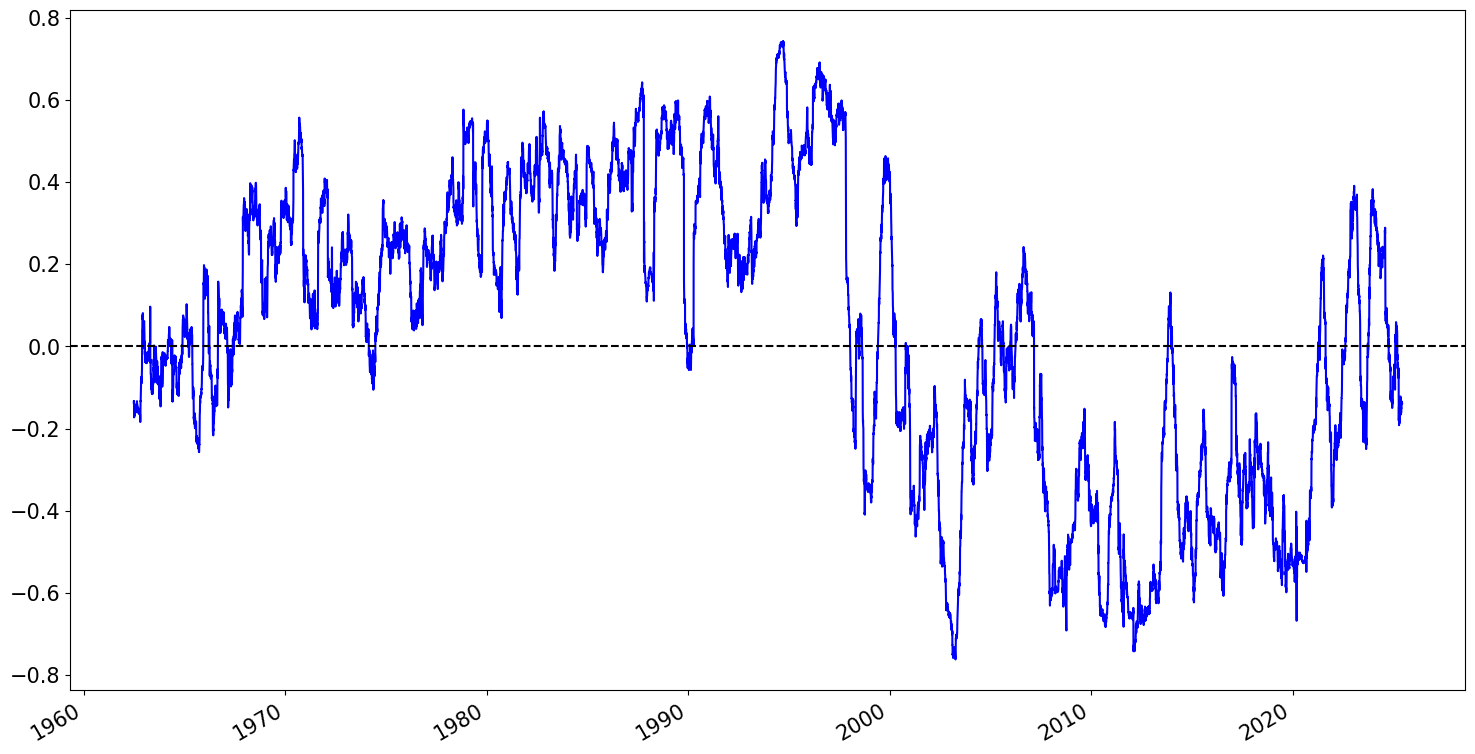

In [5]:
cc = pd.concat([t10, snp], axis=1).dropna().pct_change(1)
cc["t10"] *= -1

rolling_corr = cc["t10"].rolling(window=120).corr(cc["Close"]).dropna()
rolling_corr.plot(figsize=(18,10), fontsize=15, color='b')
plt.axhline(0, color='k', linestyle='--')

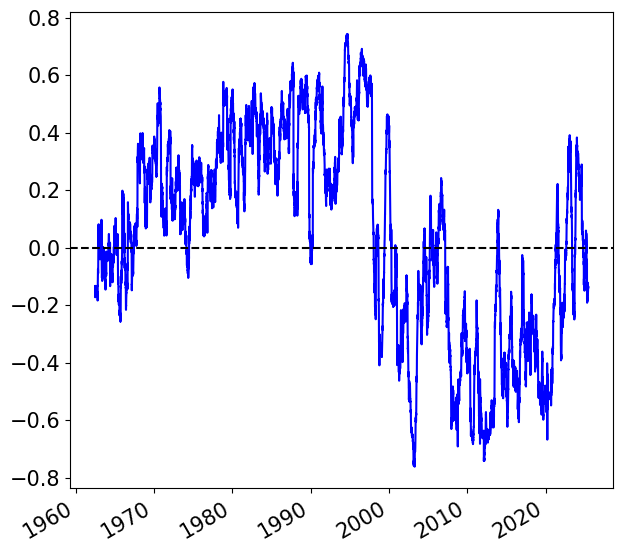

In [7]:
cc = pd.concat([t10, snp], axis=1).dropna().pct_change(1)
cc["t10"] *= -1

rolling_corr = cc["t10"].rolling(window=120).corr(cc["Close"]).dropna()
rolling_corr.plot(figsize=(7,7), fontsize=15, color='b')
plt.axhline(0, color='k', linestyle='--')

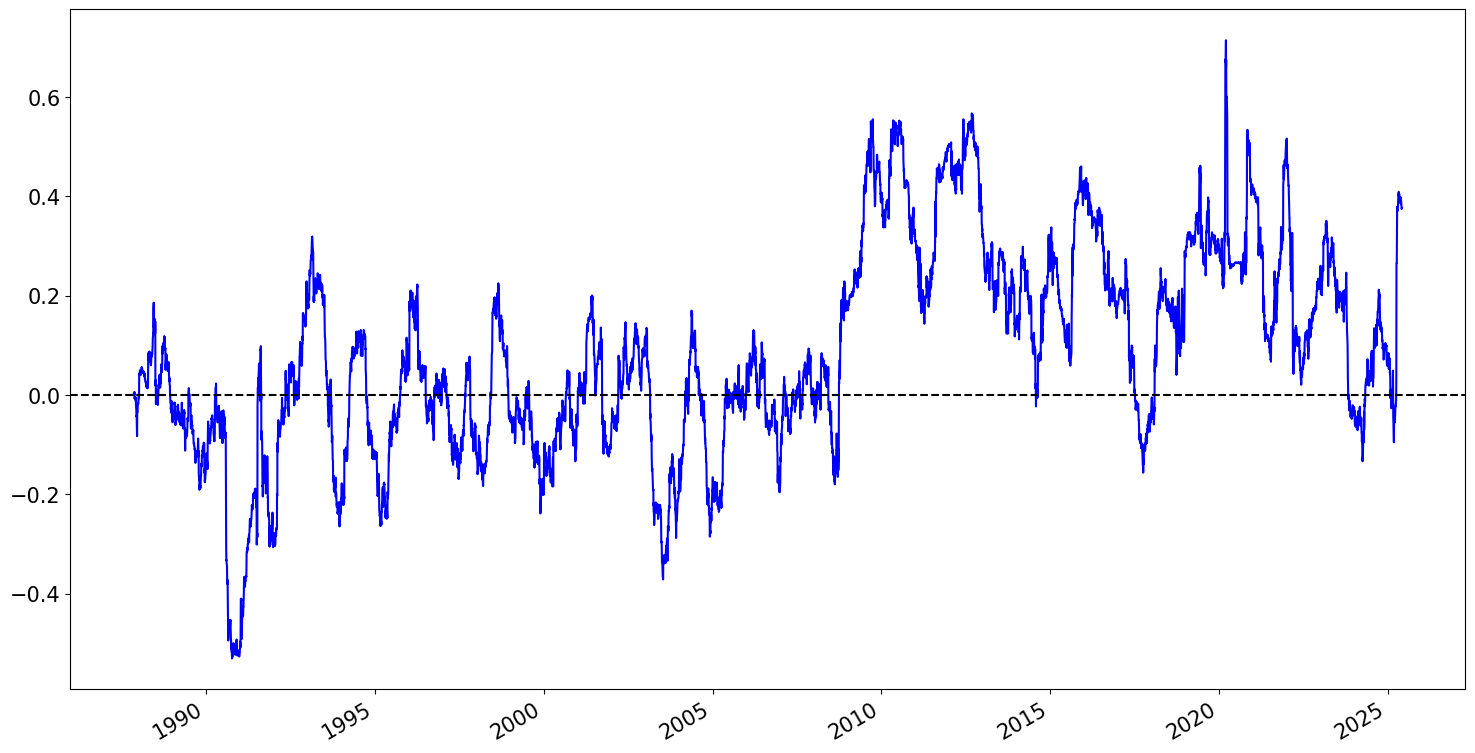

In [6]:
cc = pd.concat([brent, snp], axis=1).dropna().pct_change(1)

rolling_corr = cc["brent"].rolling(window=120).corr(cc["Close"]).dropna()
rolling_corr.plot(figsize=(18,10), fontsize=15, color='b')
plt.axhline(0, color='k', linestyle='--')

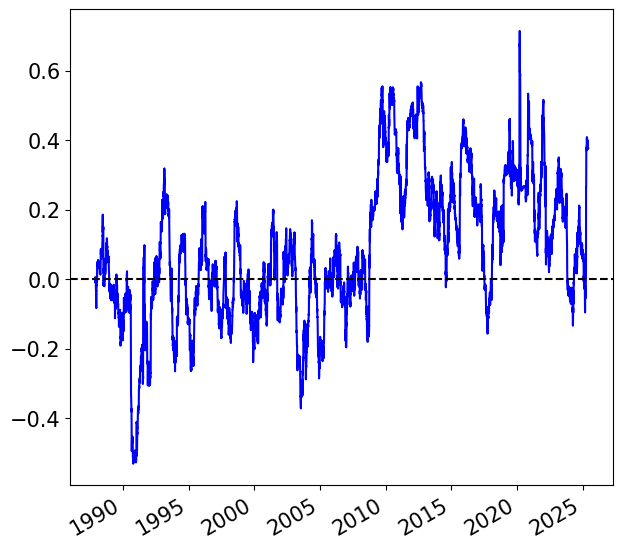

In [8]:
cc = pd.concat([brent, snp], axis=1).dropna().pct_change(1)

rolling_corr = cc["brent"].rolling(window=120).corr(cc["Close"]).dropna()
rolling_corr.plot(figsize=(7,7), fontsize=15, color='b')
plt.axhline(0, color='k', linestyle='--')